# Questão 3 - Integração Numérica

<img src="questao3.png" alt="Questao 3" width="500">

### Bibliotecas utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Passando a Tabela 1 para o programa usando 'Pandas'

In [3]:
data = {
    #Coluna das Medições
    "Medição": list(range(1, 14)),

    #Coluna das Cotas
    "Cota": [
        0, 1.5, 3, 4.5, 6, 7.5, 9,
        10.5, 12, 13.5, 15, 16.5, 18
    ],

    #Coluna das Áreas(m^2)
    "Área(m2)": [
        100, 398, 855, 3900, 7700, 20900, 35600,
        124000, 213600, 502000, 854400, 1560000, 2563200
    ]
}

In [4]:
tabela1 = pd.DataFrame(data)

#Imprimindo 'tabela1'
tabela1

,Medição,Cota,Área(m2)
0,1,0.0,100
1,2,1.5,398
2,3,3.0,855
3,4,4.5,3900
4,5,6.0,7700
5,6,7.5,20900
6,7,9.0,35600
7,8,10.5,124000
8,9,12.0,213600
9,10,13.5,502000


### Plotando o gráfico de Área x Cota

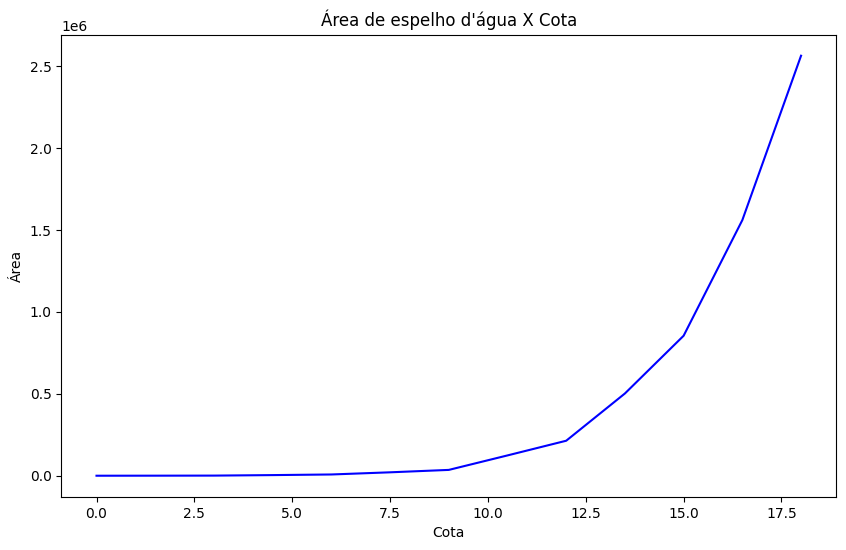

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(tabela1["Cota"], tabela1["Área(m2)"], color="blue", label="Dados")
plt.title("Área de espelho d'água X Cota")
plt.xlabel("Cota")
plt.ylabel("Área")
plt.show()

# Regra dos trapézios Múltiplos segmentos

De forma resumida, a fórmula da Regra dos Trapézios para aproximar integrais definidas pode ser expressa da seguinte forma:

\begin{equation}
    I \approx \frac{h}{2}(y_0 + 2y_1+...+2y_{n-1}+y_n)
\end{equation}

In [6]:
def regraTrapezios(eixoX, eixoY):

    eixoX_ = np.array(eixoX)
    eixoY_ = np.array(eixoY)

    numerodePontos = len(eixoX_)
    numerodeSegmentos = numerodePontos - 1
    passoMedio = (eixoX_[-1] - eixoX_[0])/numerodeSegmentos
    
    soma = 0
    for i in range(1, numerodePontos - 1):
        soma+= 2 * eixoY_[i]
    
    return (soma + eixoY_[0] + eixoY_[-1]) * passoMedio/2
    


### Chamando a função regraTrapezios()

In [7]:
volume_regraTrapezios = regraTrapezios(tabela1["Cota"], tabela1["Área(m2)"])
print(f"Volume aproximado usando a Regra dos Trapézios: {volume_regraTrapezios:.2f} m^3")

Volume aproximado usando a Regra dos Trapézios: 6907504.50 m^3


# Regra de Simpson de 1/3 Múltiplos segmentos

A regra de Simpson de 1/3 baseia-se no conhecimento de três pontos (dois segmentos)
para constituir o polinômio interpolador de Gregory-Newton que passa a ser de
segundo grau.

Temos então que:

\begin{equation}
    I \approx \frac{h}{3}[f(x_0)+4\sum_{i=1,3,5...}^{n-1}f(x_i)+2\sum_{i=2,4,6...}^{n-2}f(x_i)+f(x_n)]
\end{equation}

In [8]:
def regradeSimpson13(eixoX, eixoY):

    eixoX_ = np.array(eixoX)
    eixoY_ = np.array(eixoY)

    numerodePontos = len(eixoX_)
    numerodeSegmentos = numerodePontos - 1
    passoMedio = (eixoX_[-1] - eixoX_[0])/numerodeSegmentos

    somaPares = 0
    somaImpares = 0

    #Elementos pares do array
    for i in range(2, numerodePontos - 1, 2):
        somaPares += eixoY_[i]
    #Elementos impares do array
    for i in range(1, numerodePontos - 1, 2):
        somaImpares += eixoY_[i]

    return (passoMedio/3) * (eixoY_[0] + eixoY_[-1] + 4 * somaImpares + 2 * somaPares)


### Chamando a função regradeSimpson13()

In [9]:
volume_regradeSimpson13 = regradeSimpson13(tabela1["Cota"], tabela1["Área(m2)"])
print(f"Volume aproximado usando a Regra de Simpson 1/3: {volume_regradeSimpson13:.2f} m^3")

Volume aproximado usando a Regra de Simpson 1/3: 6816201.00 m^3


# Regra de Simpson de 3/8 Múltiplos segmentos

Nesse caso, o intervalo de integração é dividido em 03 (três) segmentos, ou quatro pontos, para
efetuar a interpolação. Portanto, o polinômio interpolador é de terceiro grau. Considerando
mais uma vez a fórmula de Gregory-Newton, desta feita para p3
(x), tem-se:

\begin{equation}
    I \approx \frac{3h}{8}[f(x_0)+3\sum_{i=1,4,7...}^{n-2}f(x_i)+3\sum_{i=2,5,8,...}^{n-1}f(x_i)+2\sum_{i=3,6,9,...}^{n-3}f(x_i)+f(x_n)]
\end{equation}


In [10]:
def regradeSimpson38(eixoX, eixoY):

    eixoX_ = np.array(eixoX)
    eixoY_ = np.array(eixoY)

    numerodePontos = len(eixoX_)
    numerodeSegmentos = numerodePontos - 1
    passoMedio = (eixoX_[-1] - eixoX_[0])/numerodeSegmentos

    soma3 = 0
    soma2 = 0

    #Elementos de coeficiente 3
    for i in range(1, numerodePontos - 2, 3):
        soma3 += eixoY_[i] + eixoY_[i+1]
    #Elementos de coeficiente 2
    for i in range(3, numerodePontos - 2, 3):
        soma2 += eixoY_[i]

    return (3 * passoMedio/8) * (eixoY_[0] + eixoY_[-1] + 3 * soma3 + 2 * soma2)


### Chamando a função regradeSimpson38()

In [11]:
volume_regradeSimpson38 = regradeSimpson38(tabela1["Cota"], tabela1["Área(m2)"])
print(f"Volume aproximado usando a Regra de Simpson 3/8: {volume_regradeSimpson38:.2f} m^3")

Volume aproximado usando a Regra de Simpson 3/8: 6745420.69 m^3


In [13]:
volume_regraTrapezios = regraTrapezios(tabela1["Cota"], tabela1["Área(m2)"])
print(f"Volume aproximado usando a Regra dos Trapézios: {volume_regraTrapezios:.2f} m^3\n")

volume_regradeSimpson13 = regradeSimpson13(tabela1["Cota"], tabela1["Área(m2)"])
print(f"Volume aproximado usando a Regra de Simpson 1/3: {volume_regradeSimpson13:.2f} m^3\n")

volume_regradeSimpson38 = regradeSimpson38(tabela1["Cota"], tabela1["Área(m2)"])
print(f"Volume aproximado usando a Regra de Simpson 3/8: {volume_regradeSimpson38:.2f} m^3\n")

Volume aproximado usando a Regra dos Trapézios: 6907504.50 m^3

Volume aproximado usando a Regra de Simpson 1/3: 6816201.00 m^3

Volume aproximado usando a Regra de Simpson 3/8: 6745420.69 m^3

